In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
df=pd.read_csv('./smoking_health_data_final.csv')

In [7]:
df.sample(5)

,age,sex,current_smoker,heart_rate,blood_pressure,cigs_per_day,chol
622,41,female,no,80,108/73,0.0,177.0
840,53,female,no,65,173/89,0.0,263.0
1519,43,male,no,92,141/82.5,0.0,367.0
3309,44,female,yes,72,132.5/82.5,20.0,205.0
546,43,male,no,86,152/96.5,0.0,126.0


In [5]:
df.shape

(3900, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             3900 non-null   int64  
 1   sex             3900 non-null   object 
 2   current_smoker  3900 non-null   object 
 3   heart_rate      3900 non-null   int64  
 4   blood_pressure  3900 non-null   object 
 5   cigs_per_day    3886 non-null   float64
 6   chol            3893 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 213.4+ KB


In [9]:
df.describe()

,age,heart_rate,cigs_per_day,chol
count,3900.000000,3900.000000,3886.000000,3893.000000
mean,49.537949,75.688974,9.168554,236.595941
std,8.559275,12.015376,12.037999,44.375365
min,32.000000,44.000000,0.000000,113.000000
25%,42.000000,68.000000,0.000000,206.000000
50%,49.000000,75.000000,0.000000,234.000000
75%,56.000000,82.000000,20.000000,263.000000
max,70.000000,143.000000,70.000000,696.000000


In [10]:
df.isna().sum()

age                0
sex                0
current_smoker     0
heart_rate         0
blood_pressure     0
cigs_per_day      14
chol               7
dtype: int64

### Data Preprocessing steps

### Dropping all the missing values

In [12]:
df.dropna(inplace=True)

In [14]:
df.isna().sum()

age               0
sex               0
current_smoker    0
heart_rate        0
blood_pressure    0
cigs_per_day      0
chol              0
dtype: int64

### Replacing male with 1 and female with 0

In [16]:
df['sex']=df['sex'].replace({'male': 1, 'female': 0})

### Replacing no with 0 and yes with 1 in current smoker attribute

In [23]:
df['current_smoker']=df['current_smoker'].replace({'no': 0, 'yes': 1})

### Changing data type from float to int

In [28]:
df['cigs_per_day']=df['cigs_per_day'].astype('int64')

### Making age groups for better visualization
1. Group 1: (32-45)
2. Group 2: (46-60)
3. Group 3: (61-70)

In [41]:
df['age_group']=df['age'].apply(lambda x:"group 1"if(x>31 and x<46)else("group 2" if (x>45 and x<61)else"group 3"))

In [42]:
df.head()

,age,sex,current_smoker,heart_rate,blood_pressure,cigs_per_day,chol,age_group
14,48,1,0,75,131/52,0,175.0,group 2
15,58,0,0,75,126/52,0,240.0,group 2
16,46,0,0,80,102/56,0,199.0,group 2
17,45,0,0,75,106/58,0,235.0,group 1
18,37,0,0,81,112/60,0,300.0,group 1


In [43]:
df.drop(columns=['age'], inplace=True)

In [48]:
df.sample(10)

,sex,current_smoker,heart_rate,blood_pressure,cigs_per_day,chol,age_group
164,1,0,58,140/80,0,205.0,group 3
1364,0,0,70,136/90,0,309.0,group 2
3612,1,1,75,147/101,30,233.0,group 1
3363,1,1,95,121/79,20,270.0,group 2
1767,0,0,75,125/87,0,274.0,group 2
1552,1,0,85,166.5/106.5,0,208.0,group 2
1763,0,0,75,124/87,0,308.0,group 2
364,0,0,85,135/88,0,288.0,group 1
2356,1,1,80,140/89.5,9,229.0,group 2
1097,1,0,52,105/70,0,221.0,group 1


### Let's analyze the number of people in each group

In [272]:
age_group_counts=df['age_group'].value_counts()
age_group_counts

group 2    1890
group 1    1457
group 3     532
Name: age_group, dtype: int64

### Group 2 has the highest number of people in the dataset

### Let's analyze the number of men and women in the dataset

In [279]:
sex_counts=df['sex'].value_counts()
sex_counts

0    2081
1    1798
Name: sex, dtype: int64

### Females are more in the dataset

In [89]:
grouped_by_age = df.groupby(['age_group', 'current_smoker']).size().unstack()

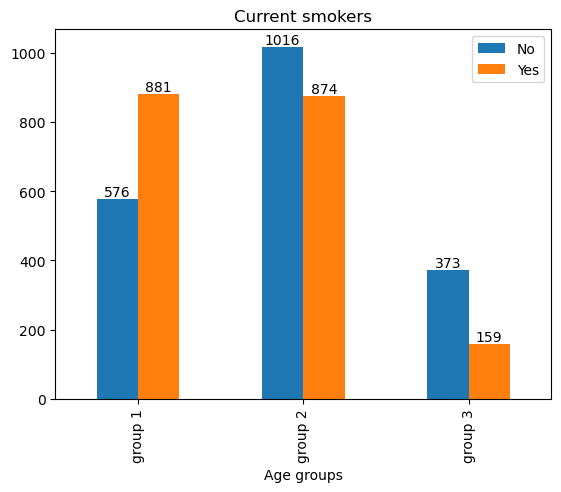

In [277]:
ax=grouped_by_age.plot(kind='bar')
for bars in ax.containers:
    ax.bar_label(bars)
labels=['No', 'Yes']
plt.xlabel("Age groups")
plt.legend(labels)
plt.title("Current smokers")
plt.show()

### Even though people in group 2 are the highest but people in group 1 has most number of current smokers

In [99]:
grouped_by_sex=df.groupby(['sex', 'current_smoker']).size().unstack()

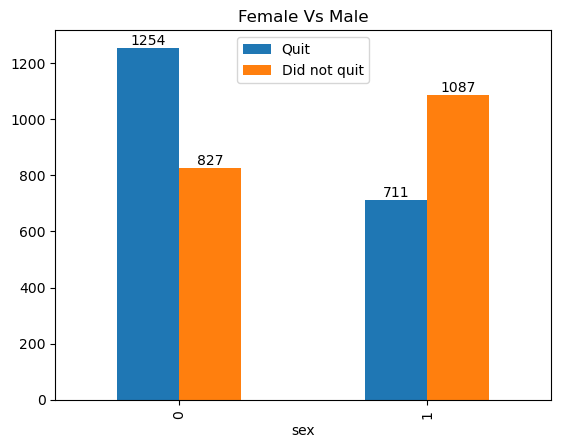

In [145]:
ax=grouped_by_sex.plot(kind='bar')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Female Vs Male")
plt.legend(['Quit', 'Did not quit'], loc='upper center')
plt.show()

### More number of women quit smoking 

### Let's analyze the people who are current smokers

In [134]:
current_smokers=df[df['current_smoker']==1]

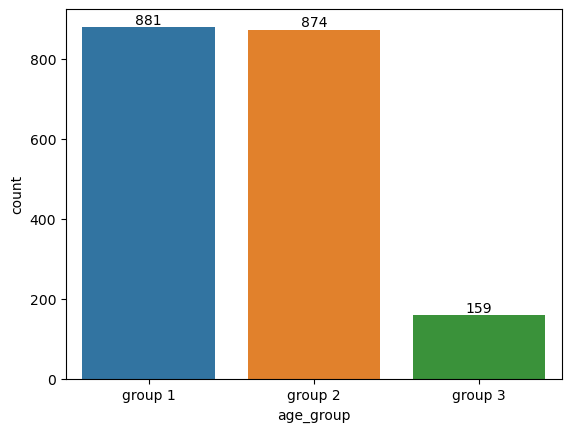

In [278]:
ax=sns.countplot(x='age_group', data=current_smokers)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

### Group 1 has the most number of current smokers

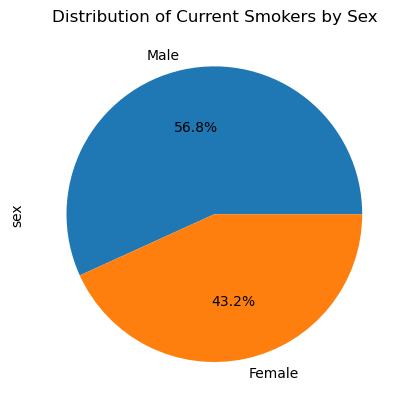

In [161]:
labels=['Male', 'Female']
current_smokers['sex'].value_counts().plot(kind='pie', labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Current Smokers by Sex')
plt.show()

### People who have the abnormal heart rate: <60 and >100 in current_smokers dataset

In [172]:
abnormal_heart_rate=current_smokers[(current_smokers['heart_rate']<60) | (current_smokers['heart_rate']>100)]

In [173]:
abnormal_heart_rate

,sex,current_smoker,heart_rate,blood_pressure,cigs_per_day,chol,age_group
1995,0,1,57,200/104,1,326.0,group 3
2018,0,1,55,113.5/61,1,189.0,group 1
2021,0,1,107,108/70,1,185.0,group 2
2037,0,1,56,142/82.5,1,220.0,group 2
2047,1,1,58,113/62,2,144.0,group 3
...,...,...,...,...,...,...,...
3816,1,1,53,126/79,40,224.0,group 1
3835,1,1,110,140/88,43,176.0,group 2
3836,1,1,103,145/88,43,272.0,group 2
3862,1,1,110,130/94,43,170.0,group 1


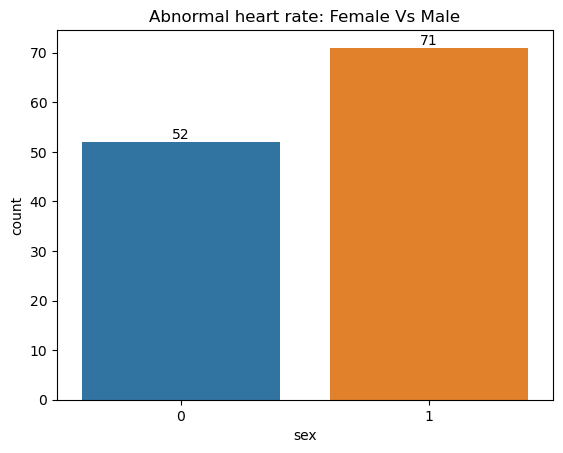

In [220]:
ax=sns.countplot(x='sex', data=abnormal_heart_rate)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Abnormal heart rate: Female Vs Male")
plt.show()

### Abnormal heart rate: Females with minimum and maximum heart rate

In [185]:
print("Max heart rate:", abnormal_heart_rate[abnormal_heart_rate['sex']==0]['heart_rate'].max())
print("Min heart rate:", abnormal_heart_rate[abnormal_heart_rate['sex']==0]['heart_rate'].min())

Max heart rate 130
Min heart rate 46


### Males with maximum and minimum heart rate

In [186]:
print("Max heart rate", abnormal_heart_rate[abnormal_heart_rate['sex']==1]['heart_rate'].max())
print("Min heart rate", abnormal_heart_rate[abnormal_heart_rate['sex']==1]['heart_rate'].min())

Max heart rate 120
Min heart rate 45


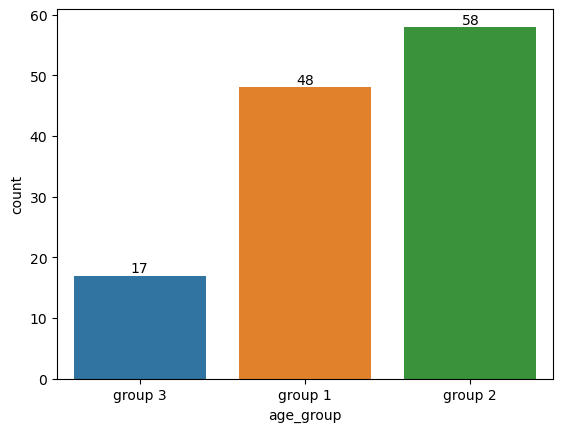

In [188]:
ax=sns.countplot(x='age_group', data=abnormal_heart_rate)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

In [223]:
ab_by_sex=abnormal_heart_rate.groupby(['age_group', 'sex']).size().unstack()

In [224]:
ab_by_sex

sex,0,1
age_group,,
group 1,16,32
group 2,26,32
group 3,10,7


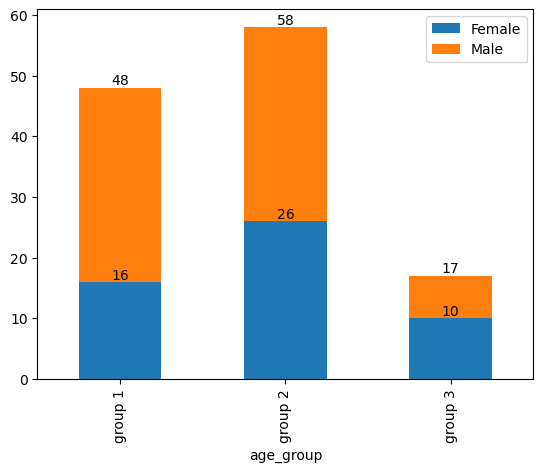

In [216]:
ax=ab_by_sex.plot(kind='bar', stacked=True)
for bars in ax.containers:
    ax.bar_label(bars)
labels=['Female', 'Male']
plt.legend(labels)
plt.show()

### Now, for people who quit smoking

In [225]:
quit_smoking=df[df['current_smoker']==0]

In [228]:
quit_smoking.head()

,sex,current_smoker,heart_rate,blood_pressure,cigs_per_day,chol,age_group
14,1,0,75,131/52,0,175.0,group 2
15,0,0,75,126/52,0,240.0,group 2
16,0,0,80,102/56,0,199.0,group 2
17,0,0,75,106/58,0,235.0,group 1
18,0,0,81,112/60,0,300.0,group 1


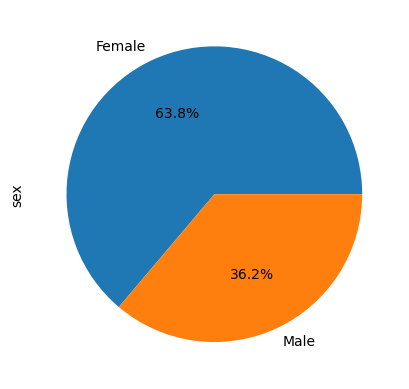

In [251]:
value=quit_smoking['sex'].value_counts()
labels=['Female', 'Male']
value.plot(kind='pie', labels=labels, autopct='%0.1f%%')
plt.show()

In [252]:
quit_smoking.describe()

,sex,current_smoker,heart_rate,cigs_per_day,chol
count,1965.000000,1965.0,1965.000000,1965.0,1965.000000
mean,0.361832,0.0,75.015267,0.0,238.645802
std,0.480653,0.0,12.231048,0.0,43.869109
min,0.000000,0.0,44.000000,0.0,124.000000
25%,0.000000,0.0,67.000000,0.0,208.000000
50%,0.000000,0.0,75.000000,0.0,235.000000
75%,1.000000,0.0,81.000000,0.0,266.000000
max,1.000000,0.0,143.000000,0.0,600.000000


In [260]:
ab_heart_rate_quit=quit_smoking[(quit_smoking['heart_rate']>110) | (quit_smoking['heart_rate']<50)]

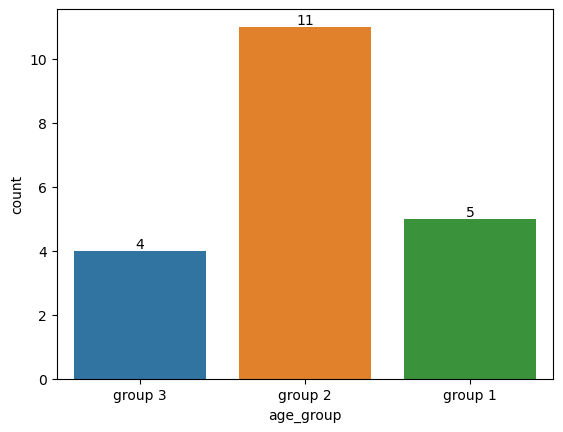

In [262]:
ax=sns.countplot(x='age_group', data=ab_heart_rate_quit)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()